<a href="https://colab.research.google.com/github/joshua-atolagbe/SandKAN/blob/main/SandKAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install imodelsx
!pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.0/114.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.2/237.2 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from yellowbrick.classifier import ROCAUC
from imodelsx import KANClassifier

In [12]:
data = pd.read_csv('data.csv')

data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Classification,Qm,Qmu,Qp,Plag,Afsp,Lf,Pore,PM+Cem
0,Subarkose,84,65,33,10,22,0,53,33
1,Quartz arenite,91,107,2,6,0,0,79,15
2,Subarkose,66,155,5,13,3,0,52,6
3,Subarkose,126,40,3,12,40,0,30,49
4,Subarkose,131,64,3,10,23,0,58,11


In [13]:
data['Classification'] = data['Classification'].map({'Subarkose':0,
                                                    'Quartz arenite':1,
                                                    'Arkose':2,
                                                    'Sublitharenite':1})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
x = data[data.columns[1:]]
y = data.Classification
train_x, test_x, train_y, test_y = train_test_split(x, y,
                                                    test_size=0.3, random_state=2024)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
scaler = StandardScaler().fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
model = KANClassifier(hidden_layer_size =1024, device='cpu',
                      regularize_activation=0.5, regularize_entropy=.4)

model.fit(train_x, train_y, batch_size=4, lr=0.01)
y_pred = model.predict(test_x)
print('Test acc', accuracy_score(test_y, y_pred))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
  4%|▍         | 4/100 [00:00<00:09, 10.44it/s]

	Early stopping
Test acc 0.7857142857142857


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0      0.250     1.000     0.400         1
           1      1.000     0.875     0.933         8
           2      1.000     0.600     0.750         5

    accuracy                          0.786        14
   macro avg      0.750     0.825     0.694        14
weighted avg      0.946     0.786     0.830        14



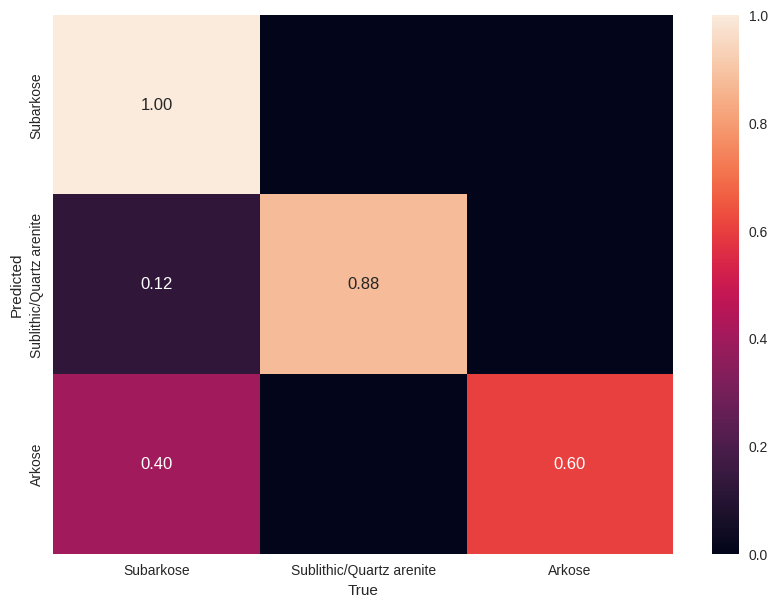

In [18]:
print(classification_report(y_pred, test_y, digits=3))

class_labels = ['Subarkose', 'Sublithic/Quartz arenite', 'Arkose']

data =  confusion_matrix(y_pred, test_y)

row_sums = data.sum(axis=1, keepdims=True)
normalized_data = data / row_sums
confusion_matrix_df = pd.DataFrame(normalized_data, index=class_labels, columns=class_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix_df, annot=True, fmt='.2f', cbar=True)

for text in plt.gca().texts:
    if text.get_text() == '0.00':
        text.set_text('')

plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
 59%|█████▉    | 59/100 [00:02<00:01, 21.59it/s]


	Early stopping


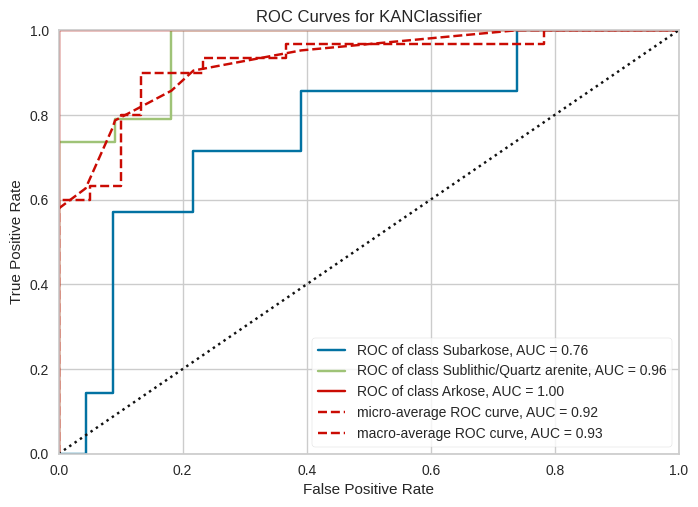

<Axes: title={'center': 'ROC Curves for KANClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [19]:
model = KANClassifier(hidden_layer_size =1024, device='cpu',
                      regularize_activation=0.5, regularize_entropy=.4)
visualizer = ROCAUC(model, classes=['Subarkose', 'Sublithic/Quartz arenite', 'Arkose'])

visualizer.fit(train_x, train_y)        # Fit the training data to the visualizer
visualizer.score(train_x, train_y)        # Evaluate the model on the test data
visualizer.show()